In [1]:
# third party libraries
import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())
from matplotlib import pyplot as plt
from sklearn.model_selection import ParameterGrid
import numpy as np
import pandas as pd
import pickle

# personal libraries
from mrsc.src.model.SVDmodel import SVDmodel
from mrsc.src.model.Target import Target
from mrsc.src.model.Donor import Donor
from mrsc.src.synthcontrol.mRSC import mRSC
from mrsc.src.dataPrep.importData import *
import mrsc.src.utils as utils

# dennis libraries
from mrsc.src.dataPrep import gameData, annualData
from mrsc.src.predictions import cvxRegression, predictionMethods, SLA, gamePredictions, gameEvals

# GAME PREDICTIONS
#### use annual forecast for game predictions in beginning

In [2]:
""" Parameters """
min_mp = 15

# read in data
df_games = gameData.createGameData()
#df_games = df_games[df_games.playMin >= min_mp]

# train/validation/test dates
trainDates = ('2012-09-01', '2016-06-01')
cvDates = ('2016-09-01', '2017-06-01')
testDates = ('2017-09-01', '2018-06-01')

# split data into train/cv/test
dfTrain, dfCV, dfTest = gameData.splitDFs(df_games, trainDates, cvDates, testDates)
dfTrainCV = pd.concat([dfTrain, dfCV])

# team data
teams = df_games.teamAbbr.unique()

# save
#gameData.saveTeamsDict(dfTrain, dfCV, dfTest, dfTrainCV, teams)
#gameData.saveTeamsPosDict(dfTrain, dfCV, dfTest, dfTrainCV, teams)

# load 
teamsPosTrainDict, teamsPosCVDict, teamsPosTestDict, teamsPosTrainCVDict = gameData.loadTeamsPosDict()
teamsTrainDict, teamsCVDict, teamsTestDict, teamsTrainCVDict = gameData.loadTeamsDict()
#teamsTrainCVDict = {team: pd.concat([teamsTrainDict[team], teamsCVDict[team]], axis=0) for team in list(teamsTrainDict.keys())}

In [25]:
# players data
players = ['LeBron James', 'Kevin Durant', 'Stephen Curry', 'Russell Westbrook', 'James Harden', 
          'Giannis Antetokounmpo', 'Anthony Davis', 'Jimmy Butler', 'Draymond Green', 'Chris Paul',
          'Klay Thompson', 'John Wall', 'Paul George', 'DeMarcus Cousins', 'Rudy Gobert', 'Kyle Lowry',
          'Paul Millsap', 'Blake Griffin', 'Damian Lillard', 'DeAndre Jordan', 'Kyrie Irving',
          'Al Horford', 'DeMar DeRozan', 'Kevin Love', 'Andre Drummond', 'Carmelo Anthony', 'LaMarcus Aldridge',
          'Kemba Walker', 'Eric Bledsoe', 'Dwight Howard', 'Eric Gordon', 'George Hill', 'Jeff Teague', 
          'Andrew Wiggins', 'Serge Ibaka', 'Avery Bradley', 'Trevor Ariza', 'Devin Booker', 'Bradley Beal',
          'Karl-Anthony Towns', 'Marc Gasol', 'Khris Middleton']

# save data
#window = 3
#n = 2
#com = 0.2
#metric = 'PTS_G'
#gameData.savePlayerTeamDict_cv(dfTrainCV, players, window, n, com, metric)
#gameData.savePlayerTeamDict(dfTrain, dfCV, dfTest, players, window, n, com, metric)

# load data
playersTrainDict, playersCVDict, playersTestDict, playersTrainCVDict = gameData.loadPlayersDict()
#playersTrainCVDict = {player: pd.concat([playersTrainDict[player], playersCVDict[player]], axis=0) for player in players}

In [4]:
# feature parameters
statsWindow = np.array([3])
statsCom = np.array([0.2])
gmWindow = np.array([3])
gmCom = np.array([0.2])
opptWindow = np.array([-1])
n = np.array([1, 2])
perfType = ['delta_mean'] #,'prevPerf', 

# model parameters
rank = np.array([2, 3, 4, 5, 6])
project = [True]
updateType = ['raw'] #, 'project', 'none'
updatePeriod = np.array([1, 20, 40, 80])

# sla parameters
slaType = ['knn']
alpha = np.array([0.05])
n_neighbors = np.array([3, 5])
weights = ['distance']
p = np.array([2])
leaf_size = np.array([30])
kernel = ['rbf']             #'sigmoid', 'cosine', 'poly'
fit_intercept = [True]

hyperparamDict = {'statsWindow': statsWindow, 'statsCom': statsCom, 'gmWindow': gmWindow,
            'gmCom': gmCom, 'opptWindow': opptWindow, 'n': n, 'perfType': perfType,
            'rank': rank, 'project': project, 'updatePeriod': updatePeriod, 'updateType': updateType,
            'type': slaType, 'alpha': alpha, 'p': p, 'n_neighbors': n_neighbors, 
            'weights': weights, 'leaf_size': leaf_size,
            'kernel': kernel, 'fit_intercept': fit_intercept}
paramGrid = list(ParameterGrid(hyperparamDict))
print(len(paramGrid))

80


## Cross Validation 

LeBron James...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


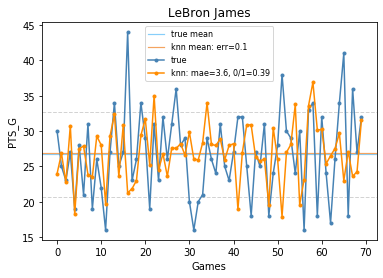

Kevin Durant...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


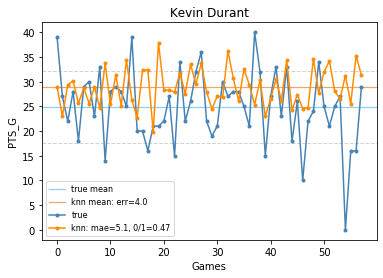

Stephen Curry...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


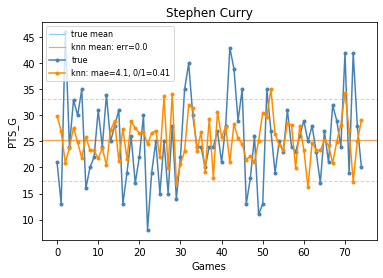

Russell Westbrook...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


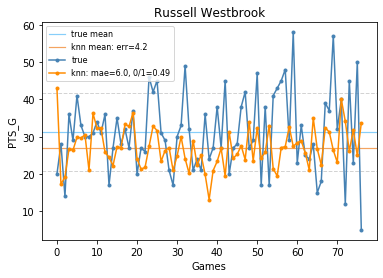

James Harden...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


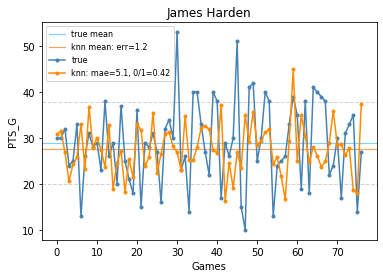

Giannis Antetokounmpo...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


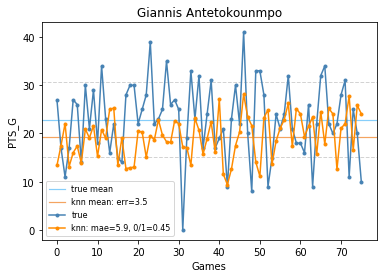

Anthony Davis...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


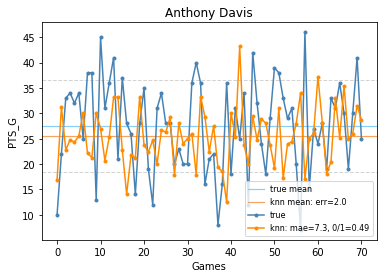

Jimmy Butler...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


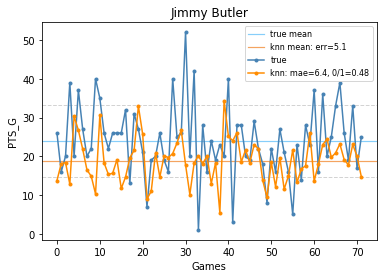

Draymond Green...


/Users/saeyoung/Documents/GitHub/mrsc/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/saeyoung/Documents/GitHub/mrsc/venv/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/saeyoung/Documents/GitHub/mrsc/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/saeyoung/Documents/GitHub/mrsc/venv/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/saeyoung/Documents/GitHub/mrsc/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/saeyoung/Documents/GitHub/mrsc/venv/lib/python3.6/s

features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


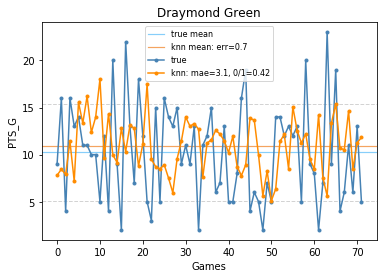

Chris Paul...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


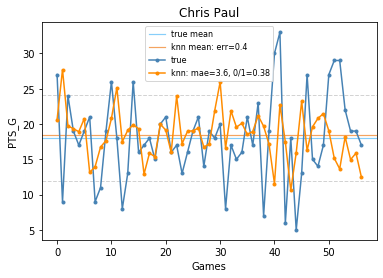

Klay Thompson...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


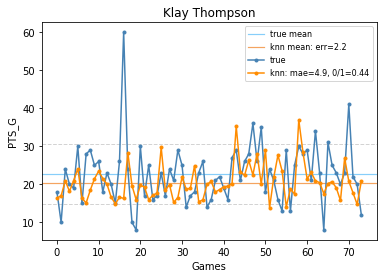

John Wall...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


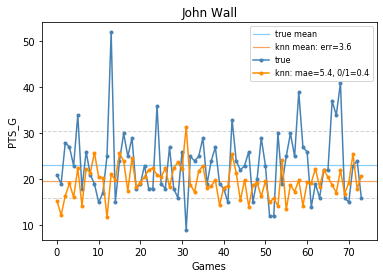

Paul George...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


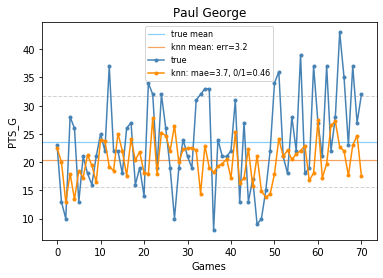

DeMarcus Cousins...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


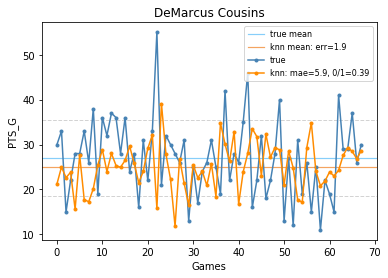

Rudy Gobert...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


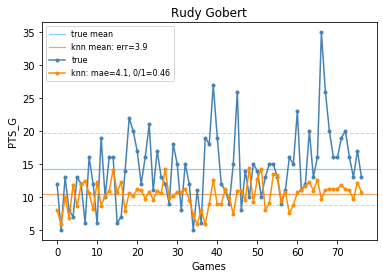

Kyle Lowry...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


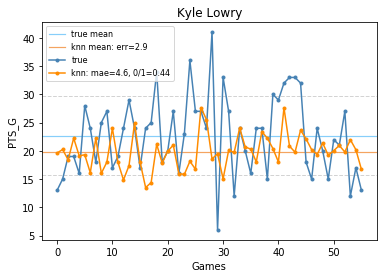

Paul Millsap...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


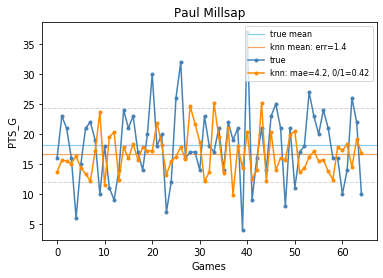

Blake Griffin...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


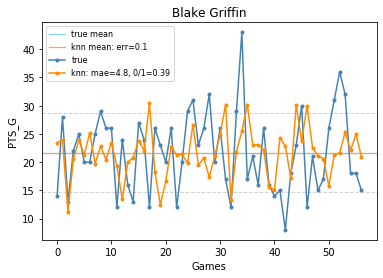

Damian Lillard...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


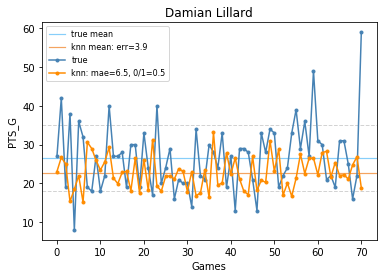

DeAndre Jordan...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


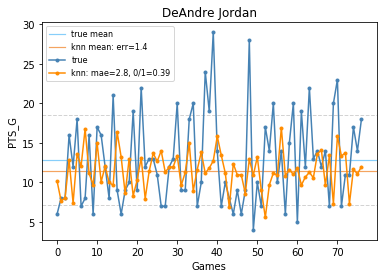

Kyrie Irving...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


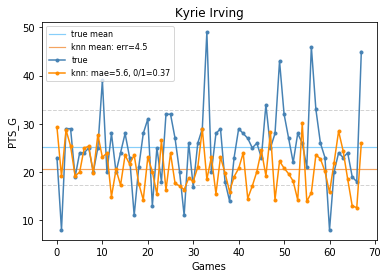

Al Horford...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


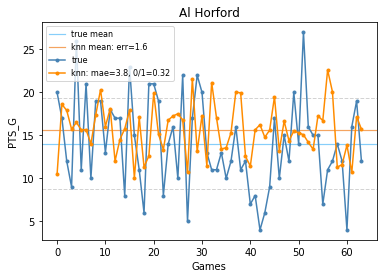

DeMar DeRozan...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


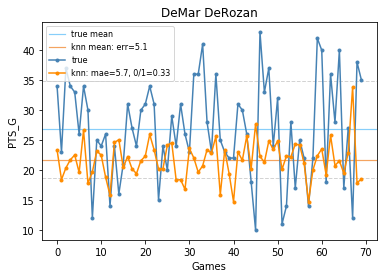

Kevin Love...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


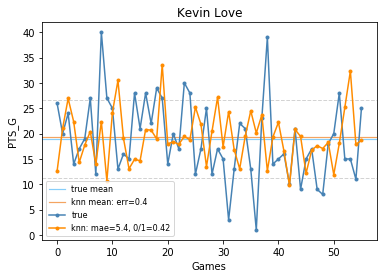

Andre Drummond...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


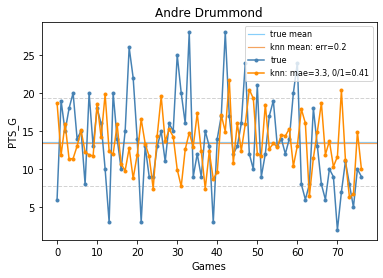

Carmelo Anthony...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


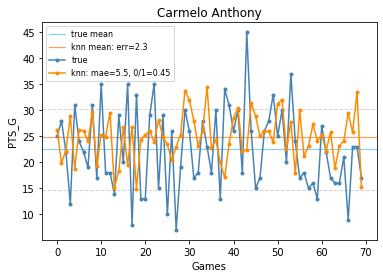

LaMarcus Aldridge...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


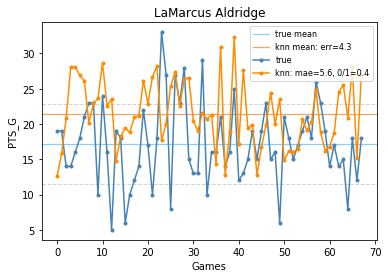

Kemba Walker...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


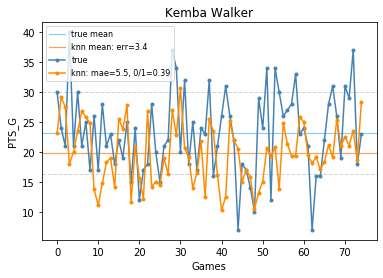

Eric Bledsoe...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


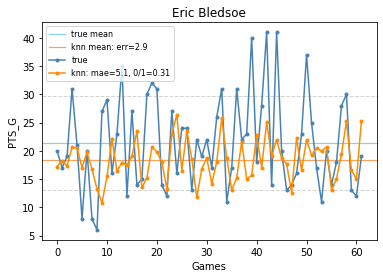

Dwight Howard...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


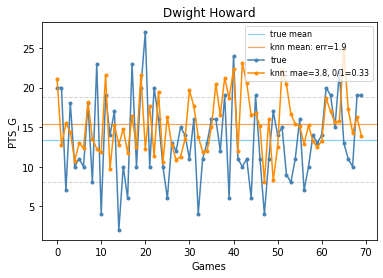

Eric Gordon...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


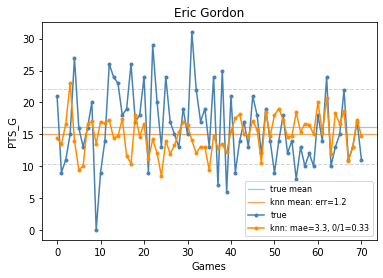

George Hill...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


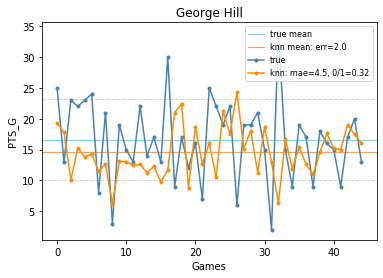

Jeff Teague...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


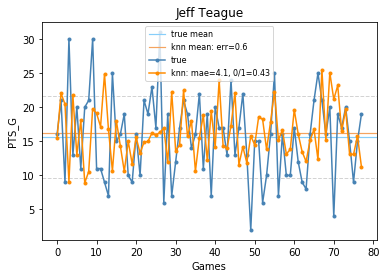

Andrew Wiggins...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


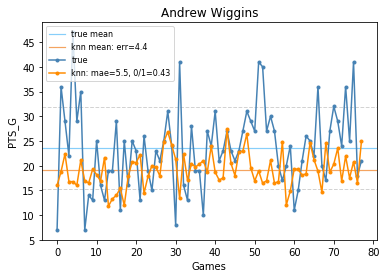

Serge Ibaka...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


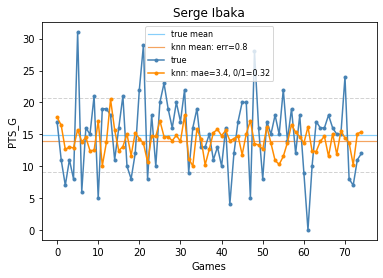

Avery Bradley...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


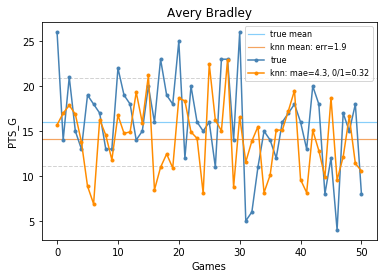

Trevor Ariza...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


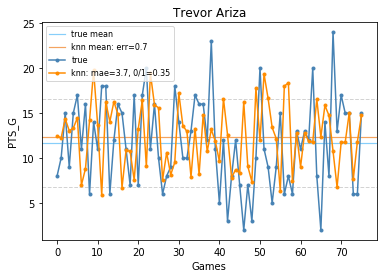

Devin Booker...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


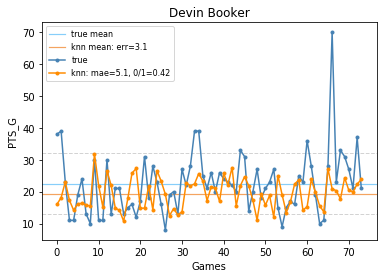

Bradley Beal...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


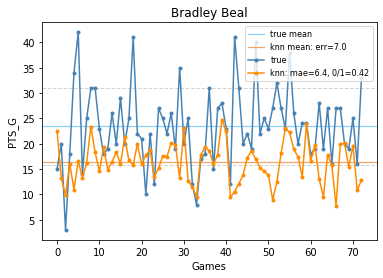

Karl-Anthony Towns...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


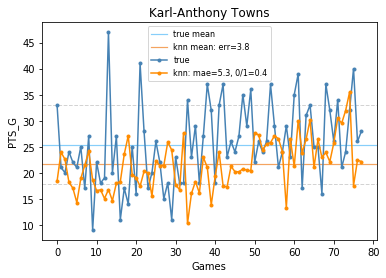

Marc Gasol...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


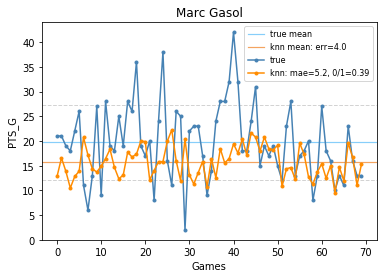

Khris Middleton...
features: {'std': {'window': 3}, 'mean': {'window': 3}, 'ewm': {'window': 3, 'com': 0.2}, 'delta': {'window': 3, 'com': 0.2}, 'gmOutcome': {'window': 3, 'com': 0.2}, 'teammates': {'perfType': 'delta_mean', 'n': 2}, 'teamLoc': {}}
model: {'rank': 6, 'project': True, 'updateType': 'raw', 'updatePeriod': 80}


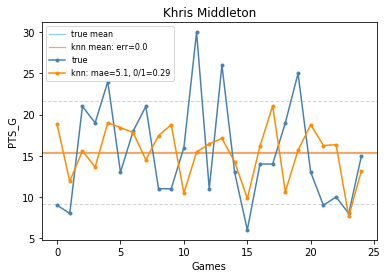

In [38]:
featureTypes = ['std', 'mean', 'ewm', 'delta', 'gmOutcome', 'teammates', 'teamLoc']
labelType = 'none'
metric = 'PTS_G'

folderName = 'SLA/'
saveFig = False
errorType = 'mae'
players_optParamDict = {player: {} for player in players}
alpha = 1
deltaType = 'raw'

for player in players:
    print("{}...".format(player))
    # create info and SLA dictionaries
    infoDict = {'player': player, 'metric': metric} 
    
    # initialize optimality conditions
    optParamDict = paramGrid[0]
    error = 1
    series = np.array([])
    obs = np.array([])
    
    # iterate through parameters
    for paramDict in paramGrid:
        # create parameter dictionaries
        infoDict, featuresDict, labelsDict, modelDict, slaDict = gamePredictions.getParamDicts(paramDict, infoDict, 
                                                                               featureTypes, labelType)
            
        #print(featuresDict)
        #print(modelDict)
        #print(slaDict)
        #print()
        
        # train 
        dataDict = {'df': dfTrain, 'teamsDict': teamsTrainDict,
                    'teammatesDict': playersTrainDict}
        SLA.trainSLA(infoDict, dataDict, featuresDict, labelsDict, modelDict, slaDict)
        
        # test 
        dataDict = {'df': dfCV, 'teamsDict': teamsCVDict,
                    'teammatesDict': playersCVDict}
        preds, true = SLA.testSLA(infoDict, dataDict, featuresDict, labelsDict, 
                                  modelDict, slaDict)
        
        # (binary) prediction error
        preds_binary = gameEvals.getBinaryDelta(preds, true, deltaType)
        true_binary = gameEvals.getBinaryDelta(true, true, deltaType)
        error_temp = gameEvals.binary_error(true_binary, preds_binary)       
        if error_temp < error:
            error = error_temp
            optParamDict = paramDict
            series = preds
            obs = true
        #print("prediction error: {}".format(error_temp.round(2)))
            
    # display results
    print("features: {}".format(featuresDict))
    print("model: {}".format(modelDict))
    
    # plot
    seriesDict = {'type': slaDict['type'], 'data': series}
    trueDict = {'data': obs}
    gameEvals.plotGame(seriesDict, trueDict, player, alpha, errorType, deltaType, 
                      folderName, metric, saveFig)
        
    # update player optimal hyperparameters
    players_optParamDict[player] = optParamDict
    print("===================================")
        

## Test

In [89]:
def get_delta(x):
    delta = np.zeros(len(x)-1)
    delta[(x - x.shift(+1))[1:]>0] = 1
    # 1 = increase
    # 0 = not increase (decrease or stays the same)
    delta = delta.astype(int)
    return list(delta)

def get_naive_pred(true):
    true_delta = get_delta(pd.Series(true))
    naive = true_delta[:-1]
    naive = np.array(naive)*(-1) +1
    return np.append(np.nan, naive)

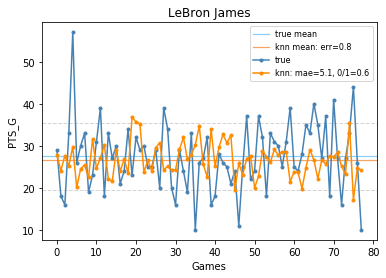

Supervised Learning Prediction Error:  0.5844155844155844
Naive Prediction Error              :  0.5921052631578947


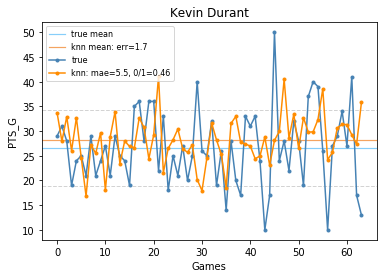

Supervised Learning Prediction Error:  0.47619047619047616
Naive Prediction Error              :  0.46774193548387094


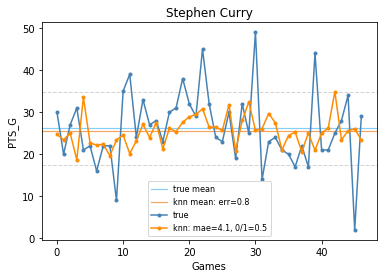

Supervised Learning Prediction Error:  0.5
Naive Prediction Error              :  0.5111111111111111


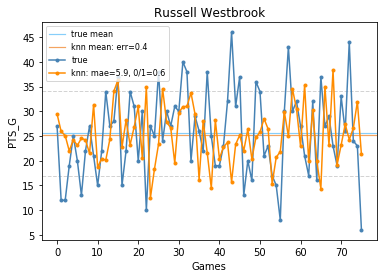

Supervised Learning Prediction Error:  0.5733333333333334
Naive Prediction Error              :  0.581081081081081


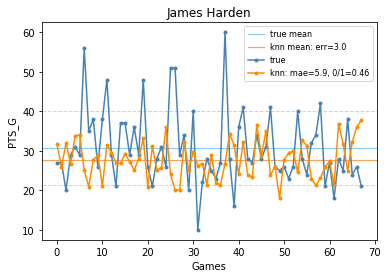

Supervised Learning Prediction Error:  0.44776119402985076
Naive Prediction Error              :  0.45454545454545453


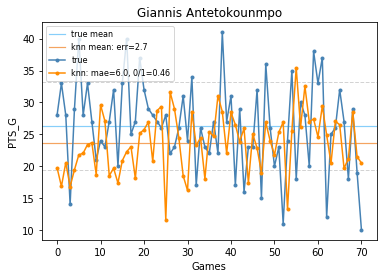

Supervised Learning Prediction Error:  0.4714285714285714
Naive Prediction Error              :  0.463768115942029


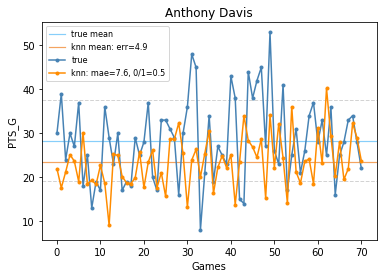

Supervised Learning Prediction Error:  0.4857142857142857
Naive Prediction Error              :  0.4782608695652174


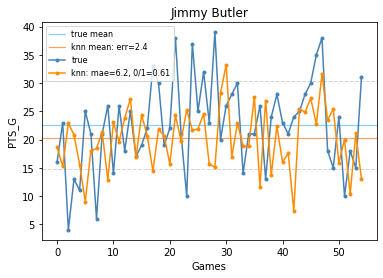

Supervised Learning Prediction Error:  0.6296296296296297
Naive Prediction Error              :  0.6226415094339622


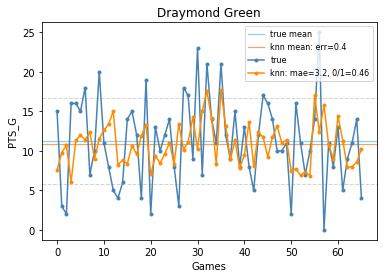

Supervised Learning Prediction Error:  0.46153846153846156
Naive Prediction Error              :  0.453125


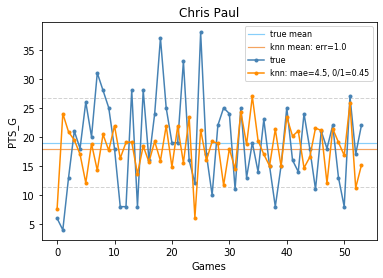

Supervised Learning Prediction Error:  0.49056603773584906
Naive Prediction Error              :  0.4807692307692308


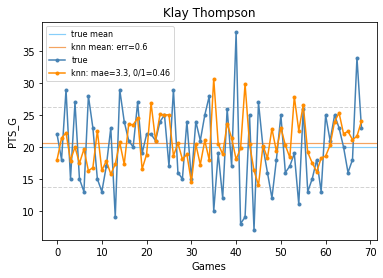

Supervised Learning Prediction Error:  0.47058823529411764
Naive Prediction Error              :  0.4626865671641791


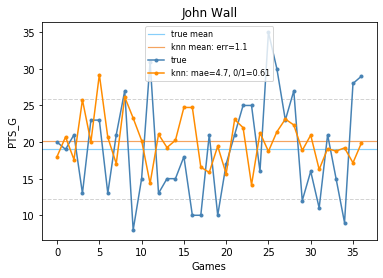

Supervised Learning Prediction Error:  0.6111111111111112
Naive Prediction Error              :  0.6


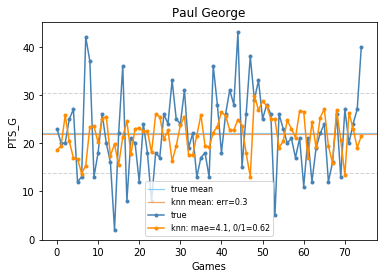

Supervised Learning Prediction Error:  0.6351351351351351
Naive Prediction Error              :  0.6301369863013698


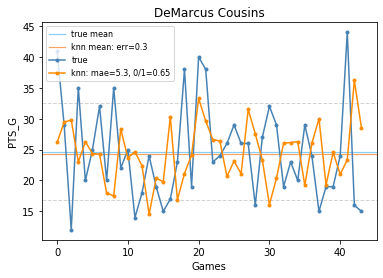

Supervised Learning Prediction Error:  0.6976744186046512
Naive Prediction Error              :  0.6904761904761905


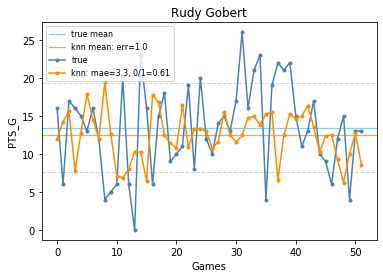

Supervised Learning Prediction Error:  0.5882352941176471
Naive Prediction Error              :  0.58


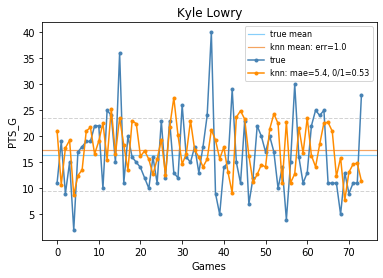

Supervised Learning Prediction Error:  0.547945205479452
Naive Prediction Error              :  0.5416666666666666


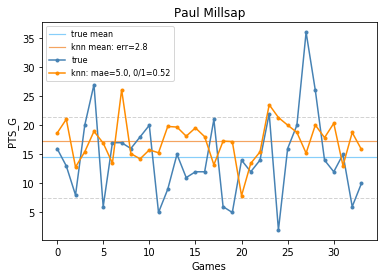

Supervised Learning Prediction Error:  0.5151515151515151
Naive Prediction Error              :  0.5


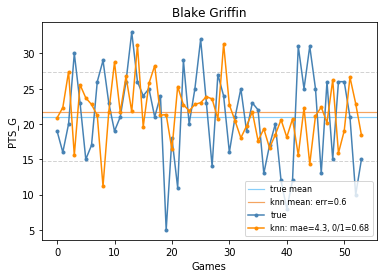

Supervised Learning Prediction Error:  0.6981132075471698
Naive Prediction Error              :  0.6923076923076923


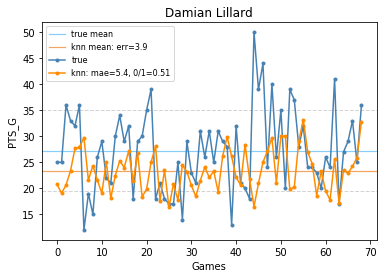

Supervised Learning Prediction Error:  0.5
Naive Prediction Error              :  0.5074626865671642


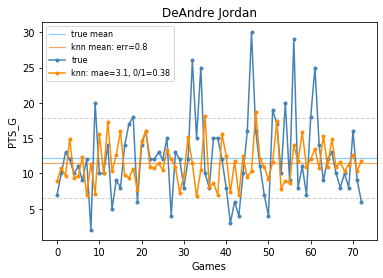

Supervised Learning Prediction Error:  0.3333333333333333
Naive Prediction Error              :  0.3380281690140845


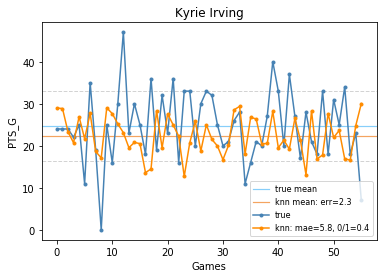

Supervised Learning Prediction Error:  0.38181818181818183
Naive Prediction Error              :  0.3888888888888889


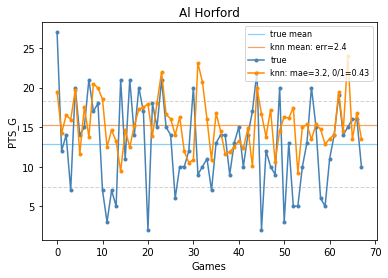

Supervised Learning Prediction Error:  0.40298507462686567
Naive Prediction Error              :  0.4090909090909091


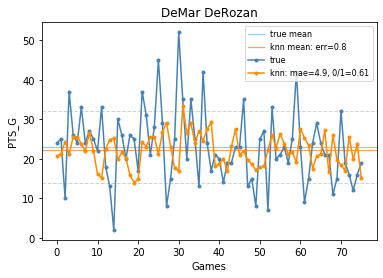

Supervised Learning Prediction Error:  0.6
Naive Prediction Error              :  0.6081081081081081


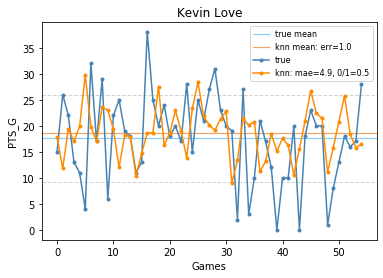

Supervised Learning Prediction Error:  0.46296296296296297
Naive Prediction Error              :  0.4528301886792453


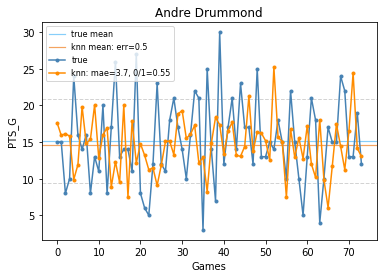

Supervised Learning Prediction Error:  0.547945205479452
Naive Prediction Error              :  0.5555555555555556


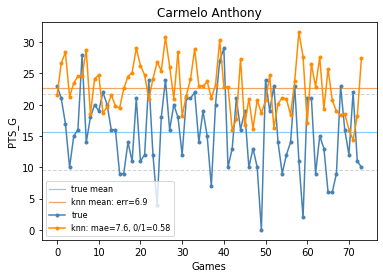

Supervised Learning Prediction Error:  0.589041095890411
Naive Prediction Error              :  0.5833333333333334


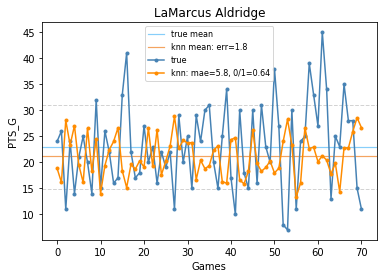

Supervised Learning Prediction Error:  0.6571428571428571
Naive Prediction Error              :  0.6521739130434783


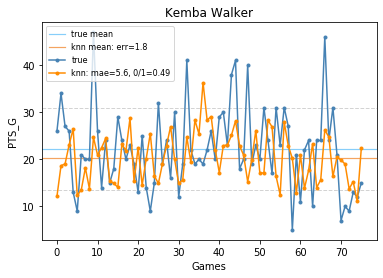

Supervised Learning Prediction Error:  0.49333333333333335
Naive Prediction Error              :  0.5


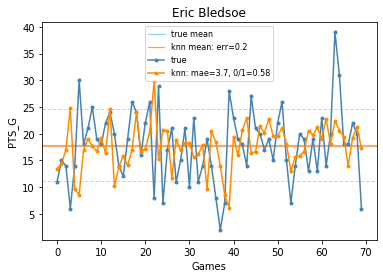

Supervised Learning Prediction Error:  0.5652173913043478
Naive Prediction Error              :  0.5735294117647058


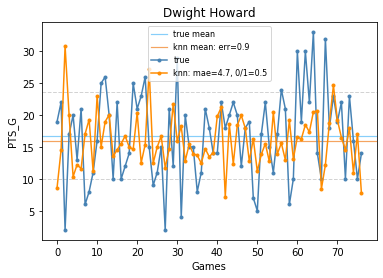

Supervised Learning Prediction Error:  0.5
Naive Prediction Error              :  0.5066666666666667


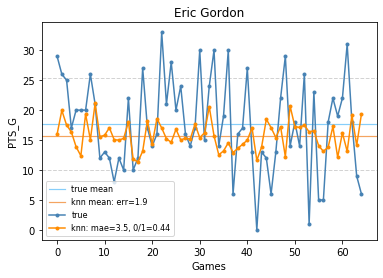

Supervised Learning Prediction Error:  0.421875
Naive Prediction Error              :  0.4126984126984127


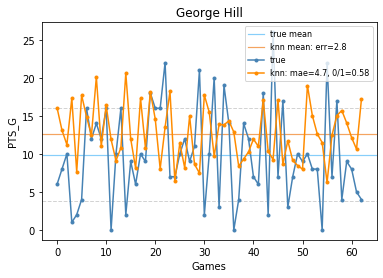

Supervised Learning Prediction Error:  0.532258064516129
Naive Prediction Error              :  0.5245901639344263


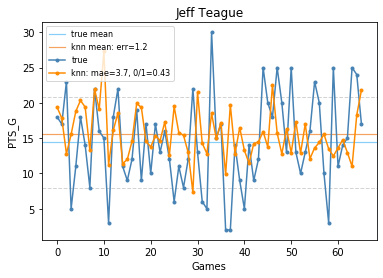

Supervised Learning Prediction Error:  0.4461538461538462
Naive Prediction Error              :  0.453125


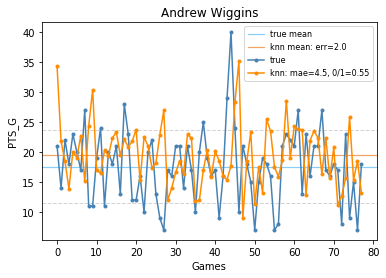

Supervised Learning Prediction Error:  0.5714285714285714
Naive Prediction Error              :  0.5789473684210527


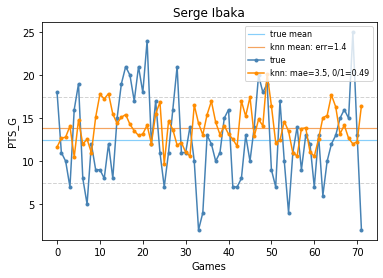

Supervised Learning Prediction Error:  0.4788732394366197
Naive Prediction Error              :  0.4714285714285714


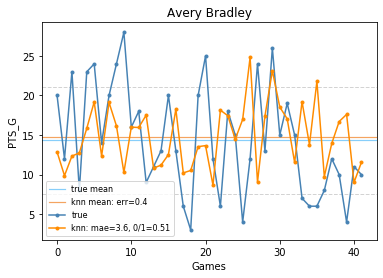

Supervised Learning Prediction Error:  0.5365853658536586
Naive Prediction Error              :  0.55


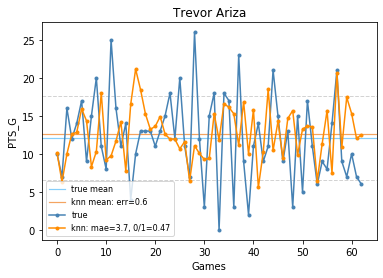

Supervised Learning Prediction Error:  0.43548387096774194
Naive Prediction Error              :  0.4426229508196721


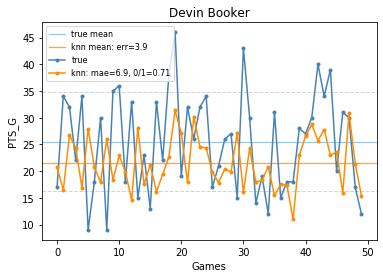

Supervised Learning Prediction Error:  0.6938775510204082
Naive Prediction Error              :  0.6875


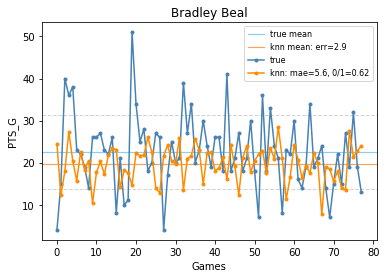

Supervised Learning Prediction Error:  0.6493506493506493
Naive Prediction Error              :  0.6447368421052632


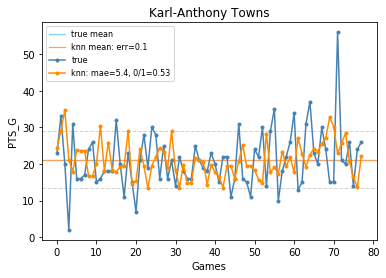

Supervised Learning Prediction Error:  0.5324675324675324
Naive Prediction Error              :  0.5394736842105263


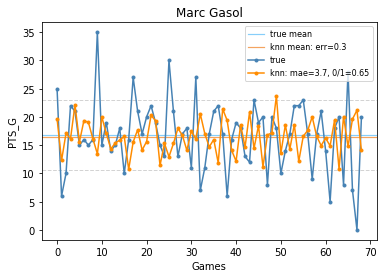

Supervised Learning Prediction Error:  0.6323529411764706
Naive Prediction Error              :  0.6417910447761194


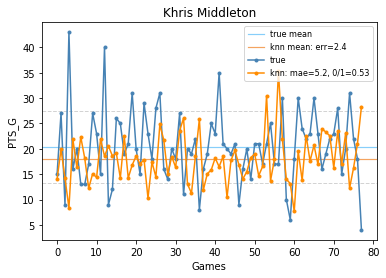

Supervised Learning Prediction Error:  0.5194805194805194
Naive Prediction Error              :  0.5263157894736842


In [92]:
folderName = 'SLA/'
saveFig = False

errors = []
for player in players:
    
    # create info and SLA dictionaries
    infoDict = {'player': player, 'metric': metric} 

    # get optimal hyperparameters for player
    optParamDict = players_optParamDict[player]

    # create parameter dictionaries
    infoDict, featuresDict, labelsDict, modelDict, slaDict = gamePredictions.getParamDicts(optParamDict, infoDict, 
                                                                           featureTypes, labelType)

    # train 
    dataDict = {'df': dfTrainCV, 'teamsDict': teamsTrainCVDict, 
                'teammatesDict': playersTrainCVDict}
    SLA.trainSLA(infoDict, dataDict, featuresDict, labelsDict, modelDict, slaDict)

    # test 
    dataDict = {'df': dfTest, 'teamsDict': teamsTestDict, 
                'teammatesDict': playersTestDict}
    preds, true = SLA.testSLA(infoDict, dataDict, featuresDict, labelsDict, modelDict, slaDict)

    # plot
    seriesDict = {'type': slaDict['type'], 'data': preds}
    trueDict = {'data': true}
    gameEvals.plotGame(seriesDict, trueDict, player, alpha, errorType, deltaType, 
                      folderName, metric, saveFig)
    
    # error calc
    true = trueDict['data']
    true_delta = get_delta(pd.Series(true))
    
    pred = seriesDict['data']
    pred_delta = get_delta(pd.Series(pred))
    error = np.mean(np.array(true_delta) != np.array(pred_delta))
    errors.append(error)
    print("Supervised Learning Prediction Error: ", error)
    
    naive_pred = get_naive_pred(true) # predict the opposite of before
    error = np.mean(np.array(true_delta[1:]) != np.array(pred_delta[1:]))
    print("Naive Prediction Error              : ", error)
    
    print("===================================")

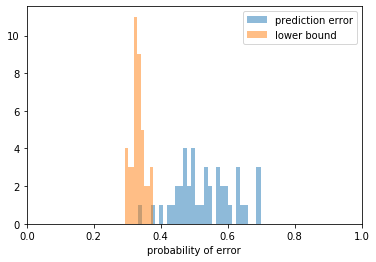

In [113]:
plt.hist(errors, bins=30, alpha=0.5, label="prediction error")
plt.hist(lbs, bins=9, alpha = 0.5, label = "lower bound")
plt.xlim(0,1)
plt.xlabel("probability of error")
plt.legend()
plt.show()

In [151]:
def get_gamma(y, x, alpha, window):
    # y : refence to calculate the mean/std
    # x : evaluate this based on men/std(y)
    # window = rolling window size
    # alpha = +- alpha * std
    roll_mean = y.rolling(window).mean()[window:]
    roll_std = y.rolling(window).std()[window:]
    gamma = np.zeros(len(x[window:]))
    gamma[x[window:] > roll_mean + roll_std * alpha] = 1
    gamma[x[window:] < roll_mean - roll_std * alpha] = -1
      
    # 1 = above mean + alpha*std
    # -1 = below mean - alpha*std
    # 0 = between mean +- alpha*std
    gamma = gamma.astype(int)
    return list(gamma)

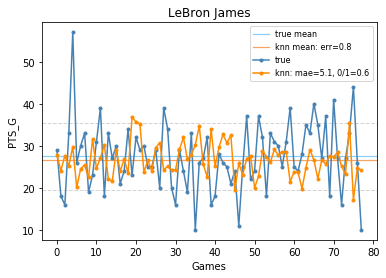

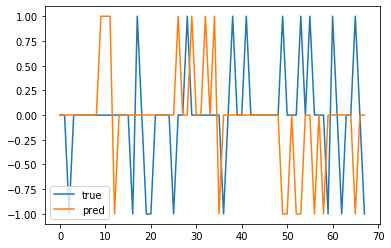

Supervised Learning Prediction Error:  0.45588235294117646


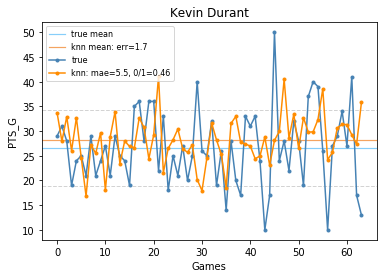

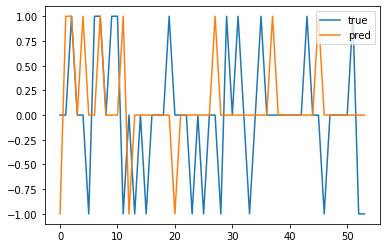

Supervised Learning Prediction Error:  0.5185185185185185


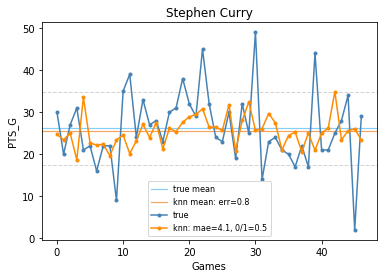

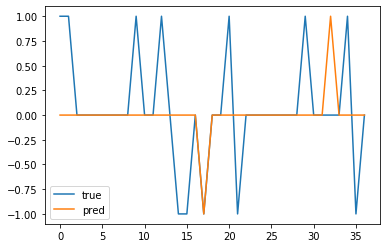

Supervised Learning Prediction Error:  0.32432432432432434


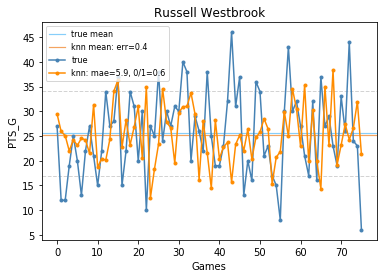

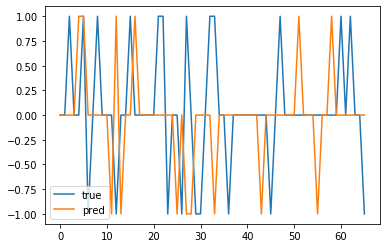

Supervised Learning Prediction Error:  0.45454545454545453


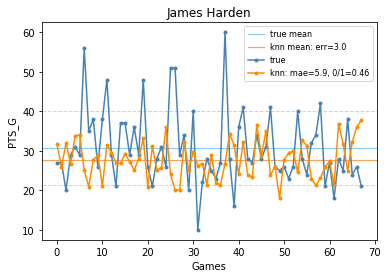

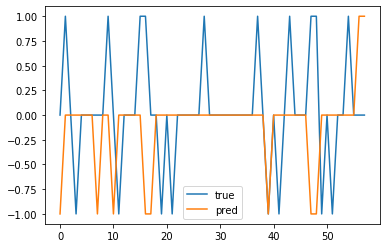

Supervised Learning Prediction Error:  0.39655172413793105


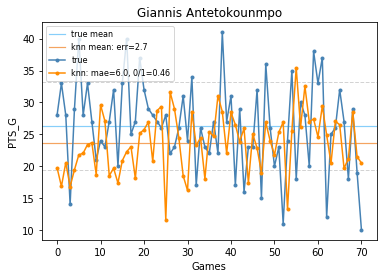

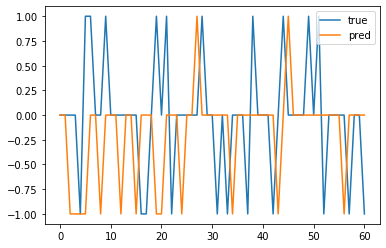

Supervised Learning Prediction Error:  0.5245901639344263


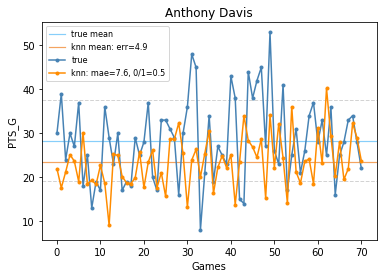

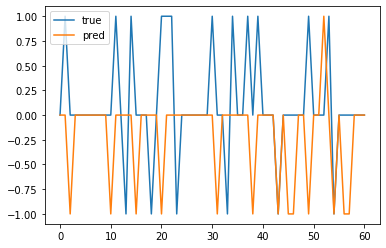

Supervised Learning Prediction Error:  0.4262295081967213


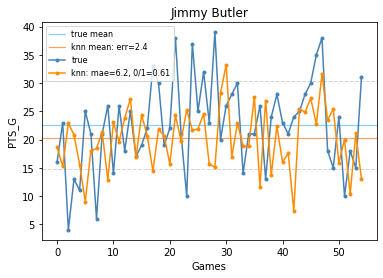

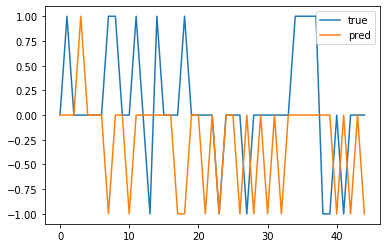

Supervised Learning Prediction Error:  0.5777777777777777


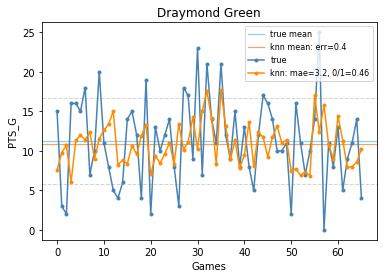

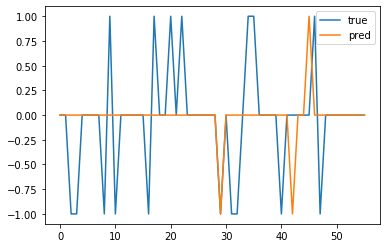

Supervised Learning Prediction Error:  0.32142857142857145


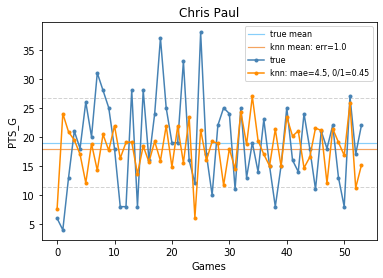

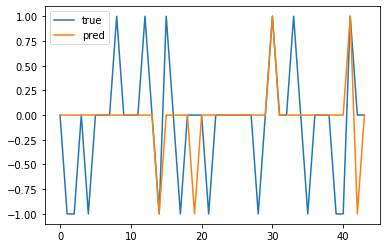

Supervised Learning Prediction Error:  0.3409090909090909


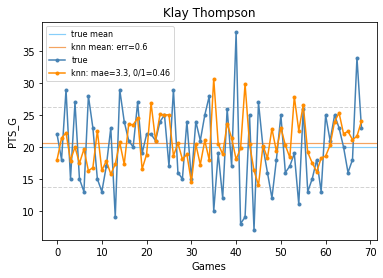

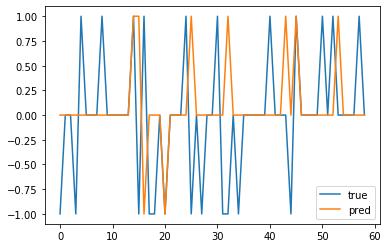

Supervised Learning Prediction Error:  0.3728813559322034


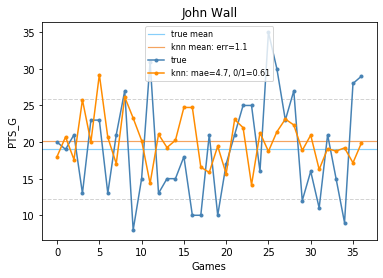

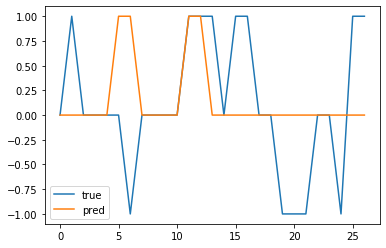

Supervised Learning Prediction Error:  0.4444444444444444


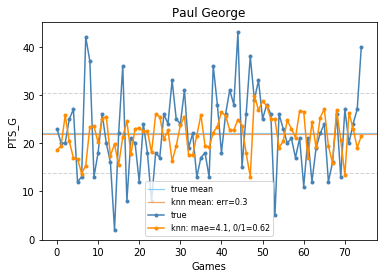

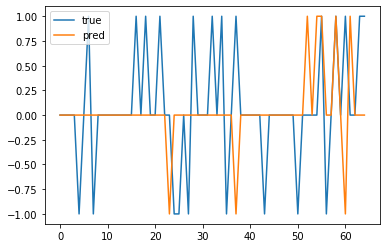

Supervised Learning Prediction Error:  0.36923076923076925


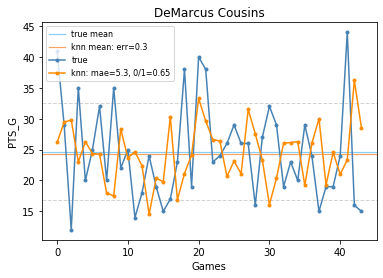

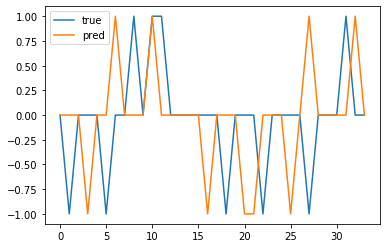

Supervised Learning Prediction Error:  0.4411764705882353


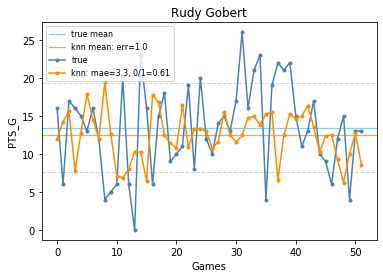

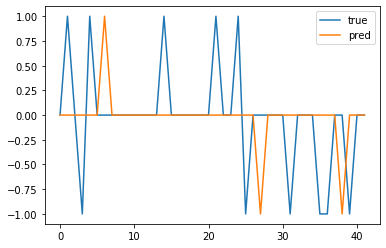

Supervised Learning Prediction Error:  0.3333333333333333


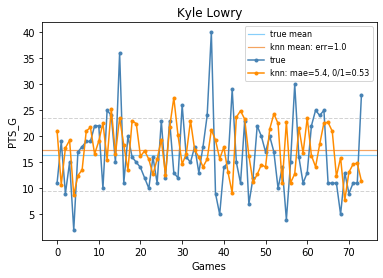

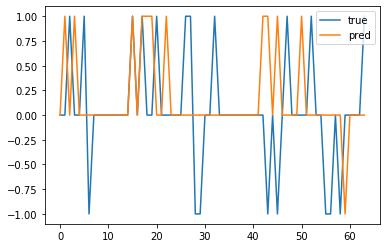

Supervised Learning Prediction Error:  0.390625


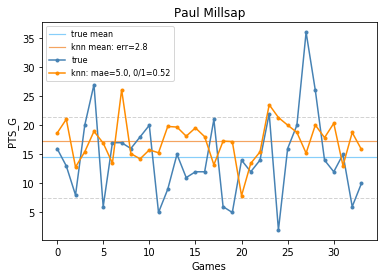

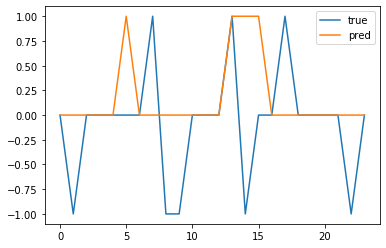

Supervised Learning Prediction Error:  0.375


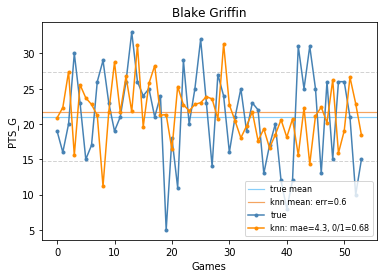

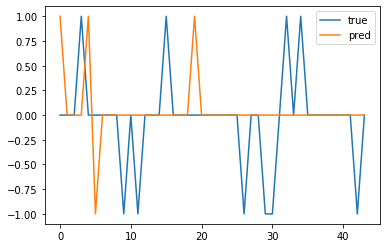

Supervised Learning Prediction Error:  0.3181818181818182


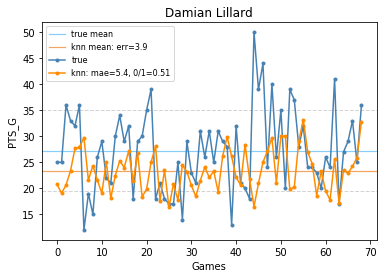

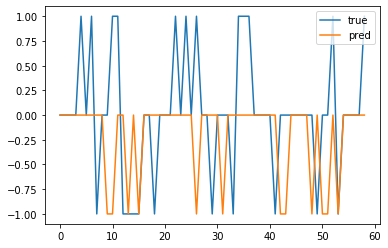

Supervised Learning Prediction Error:  0.4576271186440678


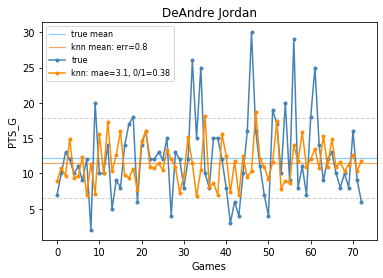

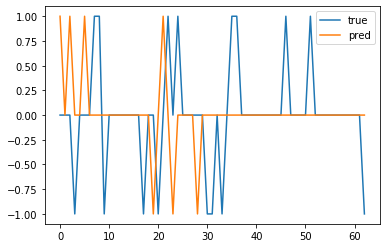

Supervised Learning Prediction Error:  0.36507936507936506


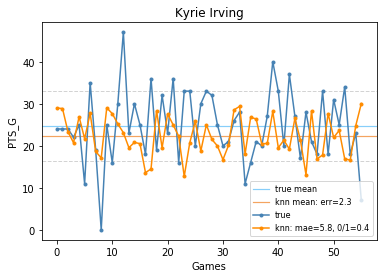

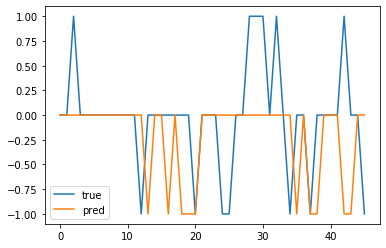

Supervised Learning Prediction Error:  0.391304347826087


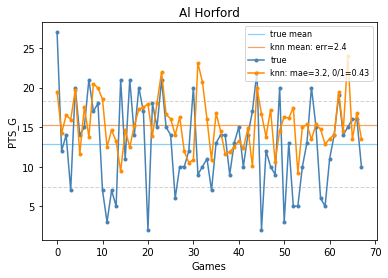

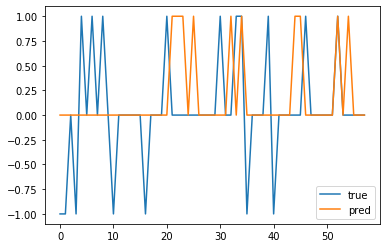

Supervised Learning Prediction Error:  0.39655172413793105


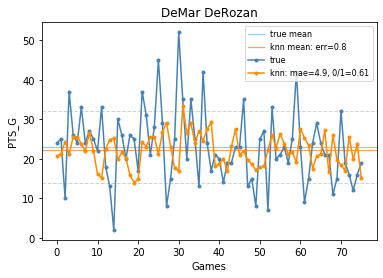

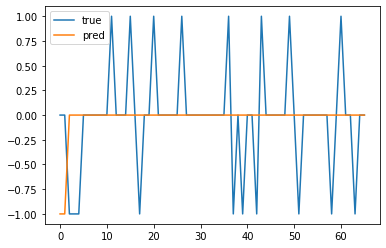

Supervised Learning Prediction Error:  0.30303030303030304


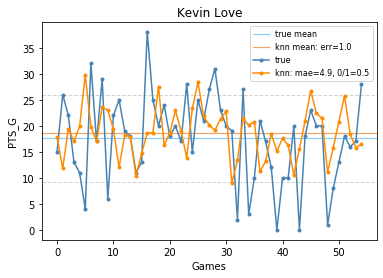

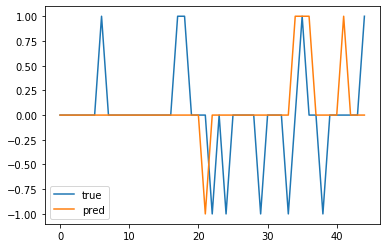

Supervised Learning Prediction Error:  0.28888888888888886


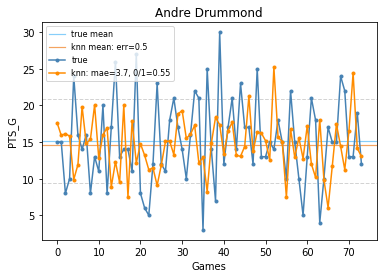

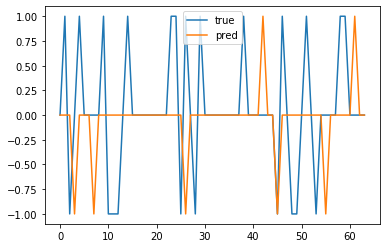

Supervised Learning Prediction Error:  0.421875


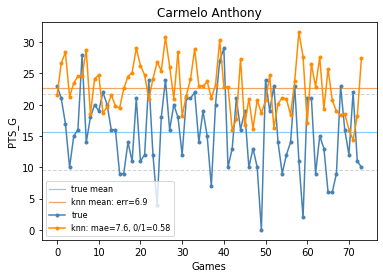

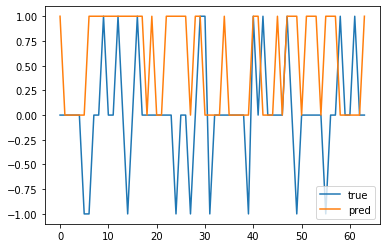

Supervised Learning Prediction Error:  0.578125


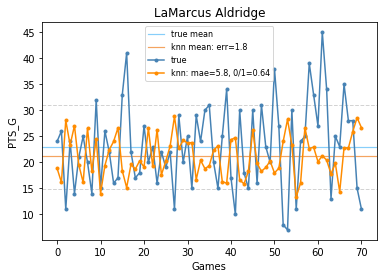

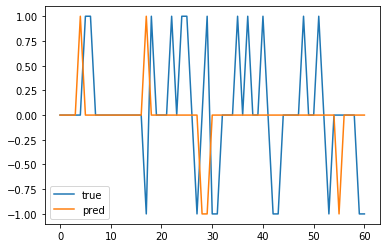

Supervised Learning Prediction Error:  0.39344262295081966


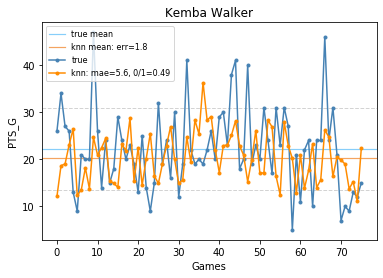

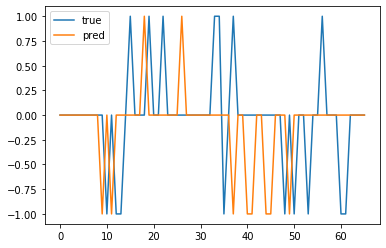

Supervised Learning Prediction Error:  0.3787878787878788


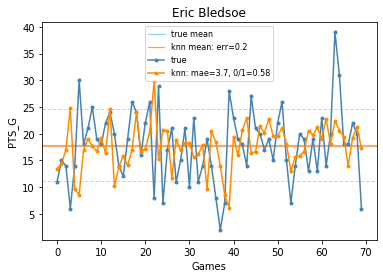

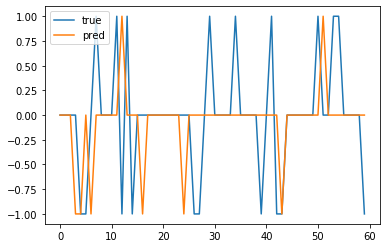

Supervised Learning Prediction Error:  0.36666666666666664


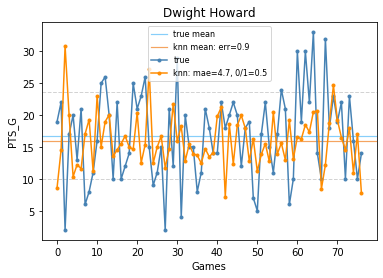

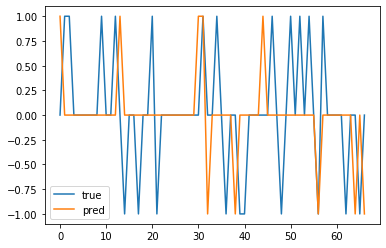

Supervised Learning Prediction Error:  0.417910447761194


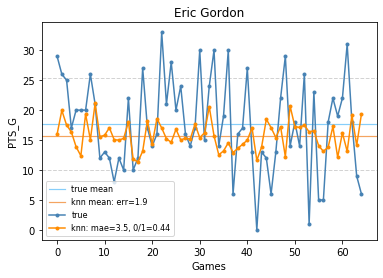

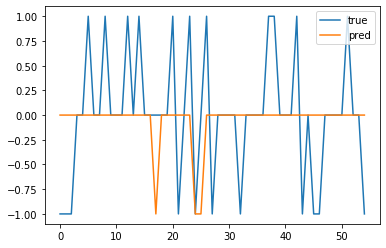

Supervised Learning Prediction Error:  0.41818181818181815


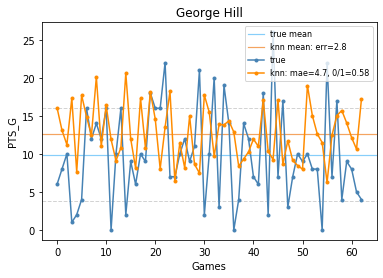

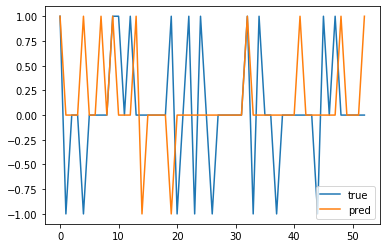

Supervised Learning Prediction Error:  0.41509433962264153


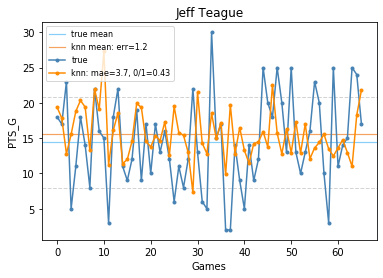

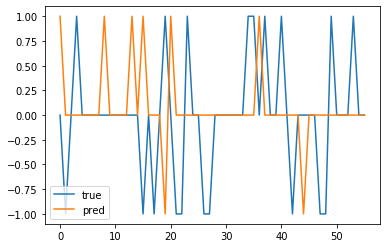

Supervised Learning Prediction Error:  0.44642857142857145


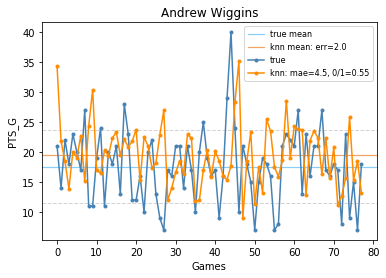

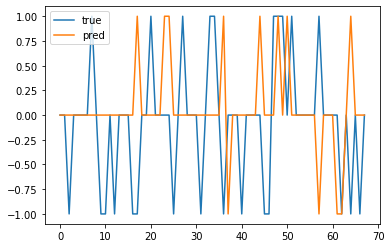

Supervised Learning Prediction Error:  0.4264705882352941


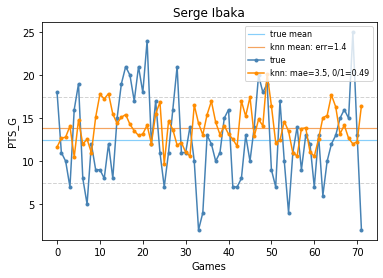

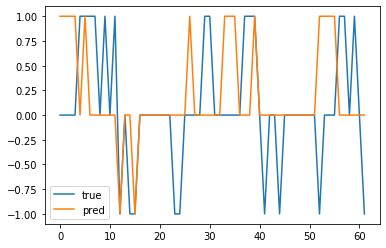

Supervised Learning Prediction Error:  0.4838709677419355


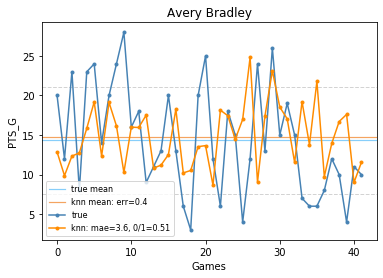

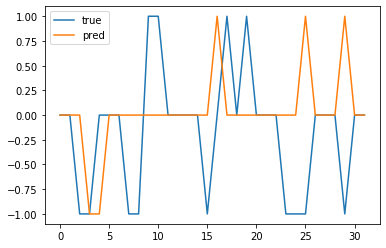

Supervised Learning Prediction Error:  0.4375


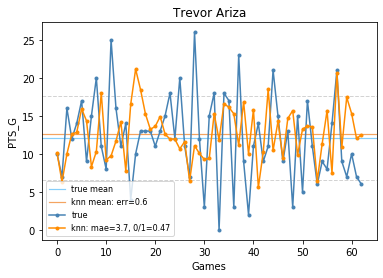

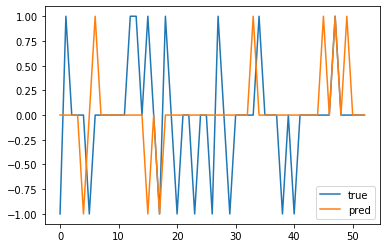

Supervised Learning Prediction Error:  0.37735849056603776


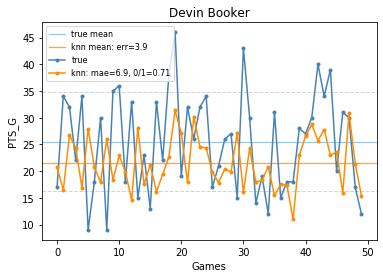

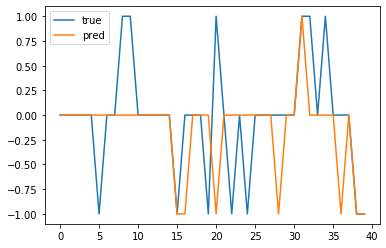

Supervised Learning Prediction Error:  0.3


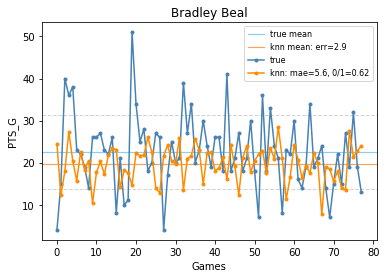

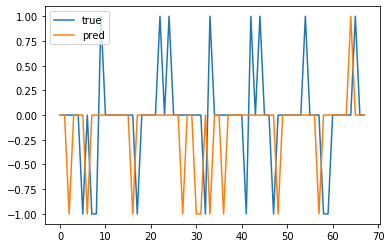

Supervised Learning Prediction Error:  0.39705882352941174


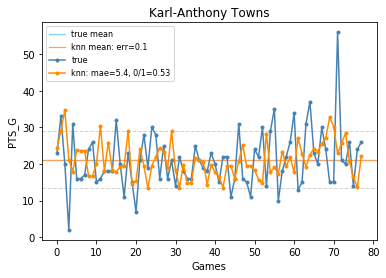

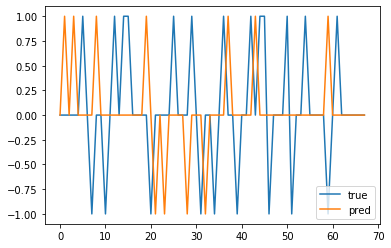

Supervised Learning Prediction Error:  0.47058823529411764


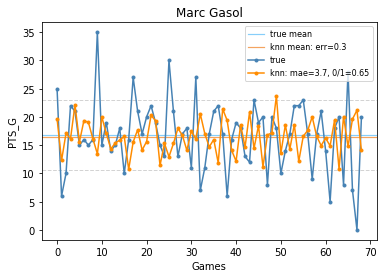

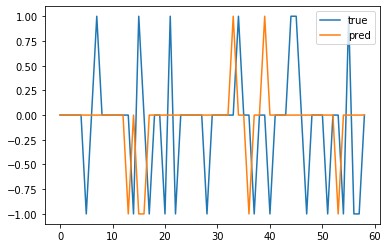

Supervised Learning Prediction Error:  0.4406779661016949


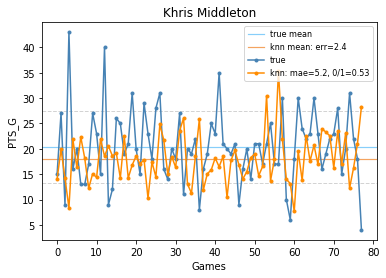

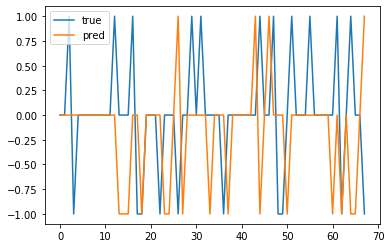

Supervised Learning Prediction Error:  0.47058823529411764


In [154]:
folderName = 'SLA/'
saveFig = False
alpha = 1
window = 10

errors = []
for player in players:
    
    # create info and SLA dictionaries
    infoDict = {'player': player, 'metric': metric} 

    # get optimal hyperparameters for player
    optParamDict = players_optParamDict[player]

    # create parameter dictionaries
    infoDict, featuresDict, labelsDict, modelDict, slaDict = gamePredictions.getParamDicts(optParamDict, infoDict, 
                                                                           featureTypes, labelType)

    # train 
    dataDict = {'df': dfTrainCV, 'teamsDict': teamsTrainCVDict, 
                'teammatesDict': playersTrainCVDict}
    SLA.trainSLA(infoDict, dataDict, featuresDict, labelsDict, modelDict, slaDict)

    # test 
    dataDict = {'df': dfTest, 'teamsDict': teamsTestDict, 
                'teammatesDict': playersTestDict}
    preds, true = SLA.testSLA(infoDict, dataDict, featuresDict, labelsDict, modelDict, slaDict)

    # plot
    seriesDict = {'type': slaDict['type'], 'data': preds}
    trueDict = {'data': true}
    gameEvals.plotGame(seriesDict, trueDict, player, alpha, errorType, deltaType, 
                      folderName, metric, saveFig)
    
    # error calc
    true = trueDict['data']
    true_gamma = get_gamma(pd.Series(true), pd.Series(true), alpha, window)
    
    pred = seriesDict['data']
    pred_gamma = get_gamma(pd.Series(true), pd.Series(pred), alpha, window)
    error = np.mean(np.array(true_gamma) != np.array(pred_gamma))
    errors.append(error)
    
    plt.plot(true_gamma, label="true")
    plt.plot(pred_gamma, label="pred")
    plt.legend()
    plt.show()
    print("Supervised Learning Prediction Error: ", error)
    
#     naive_pred = get_naive_pred(true) # predict the opposite of before
#     error = np.mean(np.array(true_delta[1:]) != np.array(pred_delta[1:]))
#     print("Naive Prediction Error              : ", error)
    print("===================================")

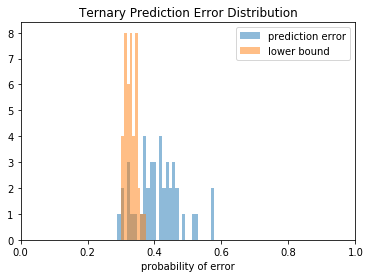

In [157]:
lbs1 = [0.31406145862255297,
 0.31662489874894145,
 0.3259037901530589,
 0.33389579533720964,
 0.3450734030697137,
 0.342852386943034,
 0.3368375019931749,
 0.3133758486451385,
 0.32842192725069697,
 0.3442104659764841,
 0.31453132784052945,
 0.31511676185908405,
 0.3032592795983417,
 0.3079672716841492,
 0.3280107823462421,
 0.342793037167948,
 0.36474554321394687,
 0.3279983291616679,
 0.32286718204095166,
 0.3271395381935068,
 0.317903589647166,
 0.32825100844184213,
 0.3010691714745024,
 0.33948187557602416,
 0.3104741892445477,
 0.3428512026436041,
 0.30823868089228623,
 0.32396437660628025,
 0.3182256326815513,
 0.35236804566673086,
 0.3159270950049347,
 0.3253625919098288,
 0.31075481910858155,
 0.32552350395936186,
 0.3455894988547191,
 0.3740236356926654,
 0.3397506009744181,
 0.342015471025677,
 0.3229652635958526,
 0.33208729476136345,
 0.34375694111513655,
 0.35205419502782803]

plt.title("Ternary Prediction Error Distribution")
plt.hist(errors, bins=30, alpha=0.5, label="prediction error")
plt.hist(lbs1, bins=9, alpha = 0.5, label = "lower bound")
plt.xlim(0,1)
plt.xlabel("probability of error")
plt.legend()
plt.show()

## ARIMA Predictions

In [ ]:
""" Set ARIMA Hyper-parameters """
#d = np.linspace(3, 10, 3)
d = np.array([3])
p = np.array([1])
q = np.array([0])

""" Create ARIMA Parameter Grids """
arimaDict = {'d': d, 'p': p, 'q': q}
arimaGrid = list(ParameterGrid(arimaDict))

# players
playerARIMA_paramsDict = {player: dict() for player in players}

# folder name
folderName = 'ARIMA/'

In [ ]:
""" TRAIN + CV Stages """
saveFig = False 

for player in players: 
    buffer = playerSLA_paramsDict[player]['windowSize']
    
    # initialize optimality conditions
    optARIMA_params = arimaGrid[0]
    error = float("inf")
    
    for paramDict in arimaGrid:
        print("{}".format(paramDict))
        
        # train and forecast on cv
        predsARIMA, true = gamePredictions.ARIMATrainTest(paramDict, dfTrain, dfCV, player, buffer, metric)
        
        # compute error
        errorTemp = rmseMA(predsARIMA, true, weekWindow)
        if errorTemp <= error: 
            error = errorTemp
            optARIMA_params = paramDict
        
        # plot
        plotData.plotMA(predsARIMA, true, weekWindow, player, folderName, metric, saveFig)
        plotData.plotMA(predsARIMA, true, monthWindow, player, folderName, metric, saveFig)
    
    # update player params
    playerARIMA_paramsDict[player] = optARIMA_params
    
    print("{}: optimal ARIMA params = {}".format(player, optARIMA_params))
    print("Error = {}".format(error.round(2)))
    print()
    

In [ ]:
""" TEST """
arimaErrorsDictWeek = {player: 0 for player in players}
arimaErrorsDictMonth = {player: 0 for player in players}
saveFig = True

for player in players:
    # get optimal hyperparameters
    optARIMA_params = playerARIMA_paramsDict[player]
    buffer = playerSLA_paramsDict[player]['windowSize']
    
    # train on (train, cv) data and forecast on test
    predsARIMA, true = gamePredictions.ARIMATrainTest(optARIMA_params, dfTrainCV, dfTest, player, buffer, metric)
    
    # compute error (minimize w.r.t. weekly error)
    error = rmseMA(predsARIMA, true, weekWindow)
    arimaErrorsDictWeek[player] = round(error, roundNum)
    error = rmseMA(predsARIMA, true, monthWindow)
    arimaErrorsDictMonth[player] = round(error, roundNum)

    # plot
    plotData.plotMA(predsARIMA, true, weekWindow, player, folderName, metric, saveFig)
    plotData.plotMA(predsARIMA, true, monthWindow, player, folderName, metric, saveFig)

# Annual Predictions

In [3]:
predMetrics = ["PTS_G"]

players = ['Russell Westbrook', 'James Harden',
       'DeMar DeRozan', 'Stephen Curry', 'LeBron James',
       'Kawhi Leonard',
        'Kemba Walker',
       'Kyrie Irving', 'Jimmy Butler', 'John Wall', 'Dwyane Wade',
       'Paul George', 'Klay Thompson', 'Carmelo Anthony',
       'Gordon Hayward', 'Kevin Durant', 'Brook Lopez',
       'Goran Dragic', 'Marc Gasol', 'Lou Williams', 'Chris Paul',
          'Al Horford', 'Al Jefferson','LaMarcus Aldridge', 'Manu Ginobili', 'Tony Parker',
          'Dwight Howard', 'Trevor Ariza', 'Zach Randolph', 'Vince Carter', 'Rudy Gay', 'Kevin Love',
          'Dirk Nowitzki', 'DeAndre Jordan', 'Blake Griffin', 'Andre Iguodala', 'Arron Afflalo',
          'Avery Bradley', 'Beno Udrih', 'C.J. Miles', 'Corey Brewer', 'David Lee', 'David West',
          'Deron Williams', 'Derrick Rose', 'Greg Monroe', 'J.J. Barea',
 'J.J. Redick', 'J.R. Smith', 'Jamal Crawford', 'Jameer Nelson', 'Jason Terry', 'Jeff Green', 'Jared Dudley', 'Joe Johnson', 
          'Jose Calderon', 'Kenneth Faried', 'Kyle Korver', 'Kyle Lowry', 'Leandro Barbosa', 'Marcin Gortat',
 'Marco Belinelli', 
 'Marcus Thornton',
 'Marreese Speights',
 'Marvin Williams',
 'Matt Barnes', 'Mike Conley', 'Michael Beasley','Monta Ellis',
 'Nene Hilario',
 'Nick Young',
 'Nicolas Batum','Omer Asik',
 'Omri Casspi',
           'Pau Gasol',
           'Paul Millsap',
 'Rajon Rondo',
 'Ramon Sessions',
 'Randy Foye',
 'Raymond Felton',
 'Reggie Jackson',
 'Richard Jefferson',
 'Robin Lopez',
 'Rodney Stuckey',
 'Roy Hibbert',
          'Serge Ibaka',
 'Shaun Livingston',
 'Spencer Hawes','Taj Gibson', 'Tony Allen', 'Wayne Ellington',
 'Wesley Johnson',
 'Wesley Matthews', 'Zaza Pachulia']

## Adding 2018 Data

In [8]:
d1 = '2017-09-01'
d2 = '2018-06-01'
df = pd.read_csv("../data/nba-enhanced-stats/2012-18_playerBoxScore.csv")
df_recent = df[(df.gmDate >= d1) & (df.gmDate <= d2)]

colname_dict = {'playPTS': 'PTS', 'playAST': 'AST', 'playTO':'TOV',
                'playFG%': 'FG%','playFT%':'FT%','play3PM':'3P',
                'playTRB':'TRB','playSTL':'STL','playBLK':'BLK',
                'teamAbbr': 'Tm', 'playPos': 'Pos', 'playMin': 'MP',
                'playDispNm': 'Player'}
df_recent = df_recent.rename(columns=colname_dict)

# add games played
numGmsPlayed = df_recent.groupby(['Player']).count()['gmDate'].values

# take totals 
sumColumns = ['PTS', 'AST', 'TOV', '3P', 'TRB', 'STL', 'BLK', 'MP']
avgColumns = ['FG%', 'FT%']
d = {sumColumn: 'sum' for sumColumn in sumColumns}
dtemp = {avgColumn: 'mean' for avgColumn in avgColumns}
d.update(dtemp)
df_recent = df_recent.groupby(['Player'], as_index=False).agg(d)
df_recent['Year'] = 2018

# fix accented characters
df_recent.Player = df_recent.Player.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# add games played
df_recent['G'] = numGmsPlayed

## RSC Predictions

In [9]:
""" USER PARAMETERS """
starting_year = 1970
min_games = 30
min_years = 2
validate_year = 2017
pred_interval = 1
params = [starting_year, min_games, min_years, validate_year, pred_interval]

In [10]:
"""
setup
"""
# user input
donor_window_type = 'sliding'
normalize_metric = None 
threshold = 0.98
helper_metrics = []

# setup 
donorSetup= [normalize_metric, donor_window_type, True]
denoiseSetup = ["SVD", "all"]
regression_method = "pinv"
verbose = False
metrics = [[metric] + helper_metrics for metric in predMetrics]

In [11]:
# create annual data
stats = annualData.createAnnualData(params, df_recent)

AttributeError: module 'mrsc.src.dataPrep.annualData' has no attribute 'createAnnualData'

In [ ]:
# create donor / target for validation
donor_v, allPivotedTableDict_v, _, _ = annualData.createTargetDonors(params, stats)

# create donor / target for testing (update prediction year)
params[3] = params[3] + 1
donor, allPivotedTableDict, targetPlayers, stats = annualData.createTargetDonors(params, stats)

In [ ]:
validPlayers = list(set(players) & set(targetPlayers))
validPlayers.sort()

In [ ]:
# create evaluation dataframes
all_pred = pd.DataFrame()
all_true = pd.DataFrame()
all_val = pd.DataFrame()

method = 'Convex'
alpha = 0.1
arima_params = (1,1,0)
ewm_param = 0.3

# use 'targetPlayers' from 'pred_year'
for targetPlayer in validPlayers: 
    player_pred = pd.DataFrame()
    player_true = pd.DataFrame()
    player_val = pd.DataFrame()
    
    for metric in metrics: 
        """ VALIDATION STAGE """
        # get predictions
        preds_val, y_val = annualPredictions.getPredictions(targetPlayer, allPivotedTableDict_v, donor_v, 
                                                            pred_interval, metric, predMetrics, threshold, 
                                                            donorSetup, denoiseSetup, regression_method, 
                                                            verbose, arima_params, ewm_param)
        
        # learn weights
        weights = predictionMethods.learnWeights(preds_val, y_val, method, alpha)
        
        """ PREDICTION STAGE """
        # get predictions
        preds_test, y_test = annualPredictions.getPredictions(targetPlayer, allPivotedTableDict, donor, 
                                                              pred_interval, metric, predMetrics, threshold, 
                                                              donorSetup, denoiseSetup, regression_method, 
                                                              verbose, arima_params, ewm_param)
        
        # make final predictions
        pred_final = predictionMethods.combinePredictions(preds_test, weights) 
        
        """ PRESENTATION STAGE """   
        df_pred = pd.DataFrame(pred_final)
        df_pred.columns = [targetPlayer]
        df_pred.index = [metric]
        player_pred = pd.concat([player_pred, df_pred], axis=0)
        
        df_true = pd.DataFrame(y_test)
        df_true.columns = [targetPlayer]
        df_true.index = [metric]
        player_true = pd.concat([player_true, df_true], axis=0)
        
    all_pred = pd.concat([all_pred, player_pred], axis=1)
    all_true = pd.concat([all_true, player_true], axis=1)
    
print("DONE!")

In [ ]:
error = all_true - all_pred
all_true.index = ['True']
all_pred.index = ['Pred']
error.index = ['Error']
df_annual = pd.concat([all_true, all_pred, error]).T
#df_annual.sort_values(by=['Error']).head()

In [ ]:
df_annual.head()

In [ ]:
""" create dictionary of top n players per team """
n = 2

df = df_games[(df_games.gmDate >= cvDates[0]) & (df_games.gmDate <= cvDates[1])]

teams = df.teamAbbr.unique()
teamsDict = {team: [] for team in teams}
for team in teams: 
    dfTeam = df[df.teamAbbr == team]
    dfAvg = dfTeam.groupby('Player', as_index=False)['PTS_G'].mean()
    teamsDict[team] = dfAvg.nlargest(n, columns=['PTS_G'])['Player'].values

In [ ]:
""" CORRELATION BETWEEN PERFORMANCES OF TOP TWO PLAYERS PER TEAM """
n = 2
teams = df.teamAbbr.unique()
teamsDict = {team: [] for team in teams}
for team in teams:
    # get team dataframe
    dfTeam = df[df.teamAbbr == team]
    
    # get top n players per team
    dfAvg = dfTeam.groupby('Player', as_index=False)['PTS_G'].mean()
    topPlayers = dfAvg.nlargest(n, columns=['PTS_G'])['Player'].values
    teamsDict[team] = topPlayers
    
    # get dates in which all players played
    dfTeamTop = dfTeam.loc[dfTeam.Player.isin(topPlayers), ['gmDate', 'Player', 'PTS_G']]
    dates = dfTeamTop.gmDate.unique()
    validDates = list()
    for date in dates:
        if dfTeamTop[dfTeamTop.gmDate == date].count()['gmDate'] == n: 
            validDates.append(date)
    dfTeamTop = dfTeamTop[dfTeamTop.gmDate.isin(validDates)]
    
    plt.figure()
    for player in topPlayers:
        vals = dfTeamTop.loc[dfTeamTop.Player==player, 'PTS_G'].values
        plt.plot(vals, label=player)
    plt.legend(loc='best')
    plt.title(team)
    plt.show()
    
    series1 = pd.Series(dfTeamTop.loc[dfTeamTop.Player==topPlayers[0], 'PTS_G'].values)
    print("Correlation = {}".format(series1.corr(pd.Series(vals))))

In [ ]:
""" TEAM PTS/G WITH AND WITHOUT TOP PLAYERS """

cols = ['gmDate', 'Player', 'playStat', 'teamAbbr', 'teamLoc', 'teamRslt', 'opptAbbr', 'PTS_G']
df = df_games.loc[(df_games.gmDate >= testDates[0]) & (df_games.gmDate <= testDates[1]), cols]

team = 'HOU'
players = teamsDict[team]
p1 = players[0]
p2 = players[1]

dfTeam = df[df.teamAbbr == team]
dfTop = dfTeam[dfTeam.Player.isin([p1, p2])]

dates = dfTop.gmDate.unique()
overlapDates = list()
nonOverlapDates = list()
for date in dates:
    if dfTop[dfTop.gmDate == date].count()['gmDate'] == 2: 
        overlapDates.append(date)
    else:
        nonOverlapDates.append(date)
        
""" Get Team PTS_G up to (but no including) date """
def getTeamPTS_G(dfTeam, date): 
    df = dfTeam.loc[dfTeam.gmDate < date]
    return df['PTS_G'].sum() / len(df.gmDate.unique())

""" Get Team PTS on date """
def getTeamPTS(dfTeam, date): 
    df = dfTeam.loc[dfTeam.gmDate == date]
    return df['PTS_G'].sum() 

for date in nonOverlapDates: 
    pts = getTeamPTS(dfTeam, date)
    pts_g = getTeamPTS_G(dfTeam, date)

    print("Date: {}".format(date))
    print("Scored {} points".format(pts, date))
    print("AVG {} points".format(pts_g, date))
    print()

In [ ]:
""" PTS/G WITH AND WITHOUT TEAMMATE """

for team, players in teamsDict.items(): 
    p1 = players[0]
    p2 = players[1]

    dfTeam = df[df.teamAbbr == team]
    dfTop = dfTeam[dfTeam.Player.isin([p1, p2])]

    dates = dfTop.gmDate.unique()
    overlapDates = list()
    nonOverlapDates = list()
    for date in dates:
        if dfTop[dfTop.gmDate == date].count()['gmDate'] == 2: 
            overlapDates.append(date)
        else:
            nonOverlapDates.append(date)

    p1Avg = dfTop.loc[(dfTop.Player==p1) & (dfTop.gmDate.isin(overlapDates)), 'PTS_G'].mean()
    df1 = dfTop.loc[(dfTop.Player==p1) & (dfTop.gmDate.isin(nonOverlapDates)), ['gmDate', 'Player', 'PTS_G']]
    df1['Overlap AVG'] = p1Avg

    p2Avg = dfTop.loc[(dfTop.Player==p2) & (dfTop.gmDate.isin(overlapDates)), 'PTS_G'].mean()
    df2 = dfTop.loc[(dfTop.Player==p2) & (dfTop.gmDate.isin(nonOverlapDates)), ['gmDate', 'Player', 'PTS_G']]
    df2['Overlap AVG'] = p2Avg
    
    print("*** {} ***".format(team))
    #print(df1)
    diff1 = df1['PTS_G'].mean() - p1Avg
    print("{} Diff = {}".format(p1, round(diff1, 2)))
    #print(df2)
    
    diff2 = df2['PTS_G'].mean() - p2Avg
    print("{} Diff = {}".format(p2, round(diff2, 2)))
    print()

In [ ]:
""" Set SLA Parameters """
# SLA Params
slaType = 'linear'
numFeatureTypes = ['std', 'mean', 'ewm']
catFeatureTypes = ['teamLoc', 'gameOutcome']
labelType = None 

""" Set SLA Hyper-parameters """
windowSizes = np.array([1, 3, 5])
rank = np.array([1, 2, 3])
ewm = np.linspace(0.1, 1.0, 5)
n = np.array([2])

# SVR
C = np.linspace(0.1, 1, 5)
gamma = ['auto', 'scale']
degree = np.array([2, 3])
epsilon = np.linspace(0.1, 0.3, 3)

# Ridge
alpha = np.linspace(0.1, 1, 5)

# RandomForest
n_estimators = np.array([8, 16, 32])
max_depth = np.array([1, 8, 16, 32])
min_samples_split = np.array([0.1, 0.3])
min_samples_leaf = np.array([0.1, 0.3])

""" Create SLA Parameter Grids """
hyperParamDict = {'windowSize': windowSizes, 'rank': rank, 'ewm': ewm, 'n': n}
svrDict = {'C': C, 'gamma': gamma, 'degree': degree, 'epsilon': epsilon}
ridgeDict = {'alpha': alpha}
randomForestDict = {'n_estimators': n_estimators, 'max_depth': max_depth, 
                    'min_samples_split': min_samples_split, 
                    'min_samples_leaf': min_samples_leaf}

svrDict.update(hyperParamDict)
ridgeDict.update(hyperParamDict)
randomForestDict.update(hyperParamDict)

lrGrid = list(ParameterGrid(hyperParamDict))
svrGrid = list(ParameterGrid(svrDict))
ridgeGrid = list(ParameterGrid(ridgeDict))
randomForestGrid = list(ParameterGrid(randomForestDict))

""" Create dictionary of optimal parameters per player """
playerSLA_paramsDict = {player: dict() for player in players} 